In [ ]:
### Name of notebook: 
### metpy_local_KHPX_N0Q_file-Copy2a
### 
### Display N0Q Refl from Ft Campbell KY

In [1]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
except:
    print('Error loading modules')
    
    
#from metpy.cbook import get_test_data
#from metpy.io import Level3File
#from metpy.plots import add_metpy_logo, add_timestamp, colortables

In [2]:
#try:
import metpy.calc as mpcalc
import metpy.constants as mpconst
from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar, Level3File
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot, add_timestamp, colortables

from siphon.catalog import TDSCatalog
from datetime import datetime
import xarray as xr
from metpy.units import units
from siphon.radarserver import RadarServer
from datetime import datetime,timedelta
    
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from siphon.cdmr import Dataset
    
import cartopy.feature as cfeature
from metpy.plots import USCOUNTIES,ctables
    
import pandas as PD
import os as OS
    
#except:
#    print('Error loading modules')
    
    
%matplotlib inline

DADASHES='-----------------------------------------------------'
dadash='-----------------------------------------------------'
DAEQUALS='==--==--==--==--==--==--==--==--==--==--==--==--==--'


now=datetime.utcnow()

#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#######  Begin Function Access_Current_Time
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#
def Access_Current_Time(now):
    #-----
    ###import datetime
    #-----
    now = datetime.datetime.now()
    #-----
    print("")
    print( "Current date and time using str method of datetime object:")
    print( str(now))
    #-----
    print( " \n")
    print( "Current date and time using instance attributes:")
    print( "Current year: %d" % now.year)
    print( "Current month: %d" % now.month)
    print( "Current day: %d" % now.day)
    print( "Current hour: %d" % now.hour)
    print( "Current minute: %d" % now.minute)
    print( "Current second: %d" % now.second)
    print( "Current microsecond: %d" % now.microsecond)
    #-----
    print( " \n")
    print( "Current date and time using strftime:")
    #print now.strftime("%Y-%m-%d %H:%M")
    print( now.strftime("%Y-%m-%d...%H:%M"))
    #-----
    print( " \n")
    print( "Current date and time using isoformat:")
    print (now.isoformat())
    return( now.strftime("%Y-%m-%d.rapidscat.ncdf.%H-%M"))
    #return now
    #
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
    #### END OF Access_Current_Time FUNCTION
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
###---


In [3]:
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#######  Begin Function IS_This_Path_Valid()
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#
def IS_This_Path_Valid(thispath):
    #-----
    # If this path is Valid, then say so [print in the affirmative]
    # return this_return_value=1
    # Otherwise, state that the path is invalid, then return this_return_value=0
    #.....................
    #
    this_return_value = 0
    #
    # Check thispath  
    #
    valid_thispath=OS.path.exists(thispath)

    if valid_thispath:
        print(dadash)
        print("You are requesting the validity of this path: "+thispath)
        print("This path is VALID and EXISTS")
        this_return_value = 1
        print(dadash)
        #
    else:
        #
        print("--CAUTION--")
        print("You are requesting the validity of this path: "+thispath)
        print("-------The indicated path is INVALID! NEED TO CHECK THIS!!!!!!!! -----------------")
        this_return_value = 0
        #-----------------------------------------------------------
        # End of if block
        #-----------------------------------------------------------
    #.....................
    return( this_return_value)
    #
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [4]:
#
#
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#######  Begin Function IS_This_File_Valid()
#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
#
def IS_This_File_Valid(thisfile):
    #---------------------
    # If this file is Valid, then say so [print in the affirmative]
    # return this_return_value=1
    # Otherwise, state that the file is invalid, then return this_return_value=0
    #.....................
    #
    this_return_value = 0
    #
    # Check thisfile
    #
    valid_thisfile=OS.path.exists(thisfile)

    if valid_thisfile:
        print(dadash)
        print("You are requesting the validity of this File: "+thisfile)
        print("This file is VALID and EXISTS")
        this_return_value = 1
        print(dadash)
        #
    else:
        #
        print("--CAUTION--")
        print("You are requesting the validity of this file: "+thisfile)
        print("-------The indicated file is INVALID! NEED TO CHECK THIS!!!!!!!! -----------------")
        this_return_value = 0
        #-----------------------------------------------------------
        # End of if block
        #-----------------------------------------------------------
    #.....................
    return( this_return_value)
    #
    #
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----
    #### END OF IS_This_File_Valid
    #-----#-----#-----#-----#-----#-----#-----#-----#-----#-----#-----

#
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [5]:
#Product codes
# NCR   Composite Refl (37)
#
# N0B - Super Res Base Refl  (153)
# N0C - Super Res CC   (161)
# N0S - Storm Rel Mean Vel (56)
# NST - SCIT (58)
# N0X - ZDR (15)
# N0G - Base Radial Vel (1 54)

#product_codes = ['N0B']
product_codes = ['N0Q']
#data_dir='/export/home/orpg9/wxdata/level_III/TLX'
#data_dir='/home/pmccrone/data/NEXRAD/levelIII/KTLX'
data_dir='/import/frb_archive/pmccrone/level_3/orpg9/2021_dec_ky'


#Level3_TLX_N0B_20220505_1529.nids  Level3_TLX_N0B_20220505_1541.nids
#Level3_TLX_N0B_20220505_1535.nids #Level3_TLX_N0G_20220505_1529.nids  Level3_TLX_N0G_20220505_1541.nids #Level3_TLX_N0G_20220505_1535.nids

# KHPX_SDUS83_N0QHPX_202112110204  KHPX_SDUS83_N0QHPX_202112110227  KHPX_SDUS83_N0QHPX_202112110327  
# KHPX_SDUS83_N0QHPX_202112110355  KHPX_SDUS83_N0QHPX_202112110417
# KHPX_SDUS83_N0QHPX_202112110210  KHPX_SDUS83_N0QHPX_202112110232  KHPX_SDUS83_N0QHPX_202112110339 
# KHPX_SDUS83_N0QHPX_202112110401  KHPX_SDUS83_N0QHPX_202112110422
# KHPX_SDUS83_N0QHPX_202112110216  KHPX_SDUS83_N0QHPX_202112110249  KHPX_SDUS83_N0QHPX_202112110344  KHPX_SDUS83_N0QHPX_202112110406
# KHPX_SDUS83_N0QHPX_202112110221  KHPX_SDUS83_N0QHPX_202112110316  KHPX_SDUS83_N0QHPX_202112110350  KHPX_SDUS83_N0QHPX_202112110411


file=data_dir+'/KHPX_SDUS83_N0QHPX_202112110327'
#file=data_dir+'/'
print('file is '+file)

file is /import/frb_archive/pmccrone/level_3/orpg9/2021_dec_ky/KHPX_SDUS83_N0QHPX_202112110327


In [6]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 8))
#add_metpy_logo(fig, 190, 85, size='large')
#for v, ctable, ax in zip(('N0Q', 'N0U'), ('NWSReflectivity', 'NWSVelocity'), axes):
#    # Open the file
#    name = get_test_data('nids/KOUN_SDUS54_{}TLX_201305202016'.format(v), as_file_obj=False)
#    f = Level3File(name)
#
#    # Pull the data out of the file object
#    datadict = f.sym_block[0][0]
#
#    # Turn into an array, then mask
#    data = np.ma.array(datadict['data'])
#    data[data == 0] = np.ma.masked
#
#    # Grab azimuths and calculate a range based on number of gates
#    az = np.array(datadict['start_az'] + [datadict['end_az'][-1]])
#    rng = np.linspace(0, f.max_range, data.shape[-1] + 1)
#
#    # Convert az,range to x,y
#    xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
#    ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))
#
#    # Plot the data
#    norm, cmap = colortables.get_with_steps(ctable, 16, 16)
#    ax.pcolormesh(xlocs, ylocs, data, norm=norm, cmap=cmap)
#    ax.set_aspect('equal', 'datalim')
#    ax.set_xlim(-40, 20)
#    ax.set_ylim(-30, 30)
#    add_timestamp(ax, f.metadata['prod_time'], y=0.02, high_contrast=True)
#
#plt.show()

In [7]:
meta_dir='/home/pmccrone/python/src/Radar_NEXRAD_process-main'

ALL_call_signs= \
["PGUA","RKSG","RKJK","RODN","KABR","KENX","KABX","KFDR","KAMA","PAHG", \
"KEWX","KBBX","PABC","KBLX","KBGM","KBMX","KBIS","KCBX","KBOX","KBRO", \
"KBUF","KCXX","KFDX","KICX","KCLX","KRLX","KCYS","KLOT","KILN","KCLE", \
"KCAE","KGWX","KCRP","KFWS","KDVN","KFTG","KDMX","KDTX","KDDC","KDOX", \
"KDLH","KDYX","KEYX","KEVX","KEPZ","KLRX","KBHX","PAPD","KFSX","KHPX", \
"KGRK","KPOE","KEOX","KSRX","KIWX","KAPX","KGGW","KGLD","KMVX","KGJX", \
"KGRR","KTFX","KGRB","KGSP","KRMX","KUEX","KHDX","KCBW","KHGX","KHTX", \
"KIND","KJKL","KJAN","KJAX","PHKN","KEAX","KBYX","PAKC","KMRX","KARX", \
"LPLA","KLCH","KESX","KDFX","KILX","KLZK","KVTX","KLVX","KLBB","KMQT", \
"KMXX","KMAX","KMLB","KNQA","KAMX","PAIH","KMAF","KMKX","KMPX","KMBX", \
"KMSX","KMOB","PHMO","KVAX","KMHX","KOHX","KLIX","KOKX","PAEC","KAKQ", \
"KLNX","KTLX","KOAX","KPAH","KPDT","KDIX","KIWA","KPBZ","KSFX","KGYX", \
"KRTX","KPUX","KRAX","KUDX","KRGX","KRIW","KFCX","KJGX","KDAX","KLSX", \
"KMTX","KSJT","KNKX","KMUX","KHNX","TJUA","KSOX","KATX","KSHV","KFSD", \
"PACG","PHKI","PHWA","KOTX","KSGF","KCCX","KLWX","KTLH","KTBW","KTWX", \
"KEMX","KINX","KVNX","KVBX","KICT","KLTX","KFFC","KYUX","KLGX","KCRI", "KOUN"]
#
#
#
#["PGUA","1","2","3","4","5","6","7","8","PAHG", \
#"KEWX","11","12","13","14","15","16","17","18","KBRO", \
#"KBUF","21","22","23","24","25","26","27","28","KCLE", \
#"KCAE","31","32","33","34","35","36","37","38","KDOX", \
#"KDLH","41","42","43","44","45","46","47","48","KHPX", \
#"KGRK","51","52","53","54","55","56","57","58","KGJX", \
#"KGRR","61","62","63","64","65","66","67","68","KHTX", \
#"KIND","71","72","73","74","75","76","77","78","KARX", \
#"LPLA","81","82","83","84","85","86","87","88","KMQT", \
#"KMXX","91","92","93","94","95","96","97","98","KMBX", \
#"KMSX","101","102","103","104","105","106","107","108","KAKQ", \
#"KLNX","111","112","113","114","115","116","117","118","KGYX", \
#"KRTX","121","122","123","124","125","126","127","128","129", \
#"KMTX","131","132","133","134","135","136","137","138","KFSD", \
#"PACG","141","142","143","144","145","146","147","148","KTWX", \
#"KEMX","151","152","153","154","155","156","157","158","159","KOUN"]
#
# KBOX - 18
# KTLX - 111
# KOAX - 112
# KMUX - 133
# TJUA - 135

My_callsign=ALL_call_signs[49] #KHPX - 49

print("My_callsign="+My_callsign)

#
dict_call_signs={"KABR":"Aberdeen_SD", "KABX":"Albuquerque_NM", "KAKQ":"Norfolk-VA", \
"KAMA":"Amarillo_TX", "KBBX":"Beale-AFB_CA", \
"KAMX":"Miami-FL", "KAPX":"Gaylord_MI", "KARX":"La-Crosse_WI", "KATX":"Seattle-Tacoma_WA", \
"KBGM":"Binghamton_NY", "KBHX":"Eureka_CA", "KBIS":"Bismarck_ND", "KBLX":"Billings_MT", \
"KBMX":"Birmingham_AL", "KCAE":"Columbia_SC", \
"KBOX":"Boston-MA", "KBRO":"Brownsville-TX", "KBUF":"Buffalo_NY", "KBYX":"Key-West-FL", \
"KCBW":"Houlton-Maine", "KCBX":"Boise_ID", "KCCX":"State-College_PA", "KCLE":"Cleveland_OH", \
"KCLX":"Charleston-SC", "KDDC":"Dodge-City_KS", \
"KCRP":"Corpus-Christi-TX", "KCXX":"Burlington_VT", "KCYS":"Cheyenne_WY", "KDAX":"Sacramento_CA", \
"KDFX":"Laughlin-AFB_TX", "KDIX":"Philadelphia-PA", "KDLH":"Duluth_MN", "KDMX":"Des-Moines_IA", \
"KDOX":"Dover-AFB-DE", "KEMX":"Tucson_AZ", \
"KDTX":"Detroit_MI", "KDVN":"Davenport_IA", "KDYX":"Dyess-AFB_TX", "KEAX":"Kansas-City_MO", \
"KENX":"Albany_NY", "KEOX":"Fort-Rucker_AL", "KEPZ":"El-Paso_TX", "KESX":"Las-Vegas_NV", \
"KEVX":"Eglin-AFB-FL", "KFDX":"Cannon-AFB_NM", \
"KEWX":"Austin-San-Antonio_TX", "KEYX":"Edwards-AFB_CA", "KFCX":"Roanoke_VA", "KFDR":"Altus-AFB_OK", \
"KFFC":"Atlanta_GA", "KFSD":"Sioux-Falls_SD", "KFSX":"Flagstaff_AZ","KFTG":"Denver_CO", \
"KFWS":"Dallas-Ft.Worth_TX", "KGRK":"Fort-Hood_TX", \
"KGGW":"Glasgow_MT", "KGJX":"Grand-Junction_Co", "KGLD":"Goodland_KS", "KGRB":"Green-Bay_WI", \
"KGRR":"Grand-Rapids_MI", "KGSP":"Greer_SC", "KGWX":"Columbus-AFB,_ MS", "KGYX":"Portland-Maine", \
"KHDX":"Holloman-AFB_NM", "KHTX":"Huntsville_AL",  \
"KHGX":"Houston-Galveston-TX", "KHNX":"San-Joaquin-Valley_CA", "KHPX":"Fort-Campbell_KY", \
"KICT":"Wichita_KS", "KICX":"Cedar-City_UT", "KILN":"Cincinnati_OH", "KILX":"Lincoln_IL", \
"KIND":"Indianapolis_IN", "KJAX":"Jacksonville-FL", \
"KINX":"Tulsa_OK", "KIWA":"Phoenix_AZ", "KIWX":"Fort-Wayne_IN", "KJAN":"Jackson_MS", \
"KJGX":"Robins-AFB_GA", "KJKL":"Jackson_KY", "KLBB":"Lubbock_TX", "KLCH":"Lake-Charles-LA", \
"KLIX":"New-Orleans-LA", "KLTX":"Wilmington-NC", \
"KLNX":"North-Platte_NE", "KLOT":"Chicago_IL", "KLRX":"Elko_NV", "KLSX":"Saint-Louis_ MO", \
"KLVX":"Louisville_KY", "KLWX":"Sterling-VA", "KLZK":"Little-Rock_AR", "KMAF":"Midland-Odessa_TX", \
"KMAX":"Medford_OR", "KMOB":"Mobile-AL", \
"KMBX":"Minot-AFB_ND", "KMHX":"Morehead-City-NC", "KMKX":"Milwaukee_WI", "KMLB":"Melbourne-FL", \
"KMPX":"Minneapolis-St.Paul_MN", "KMQT":"Marquette_MI", "KMRX":"Knoxville-Tri-Cities_TN", \
"KMSX":"Missoula_MT", "KNKX":"San-Diego-CA", \
"KMTX":"Salt-Lake-City_UT", "KMUX":"San-Francisco_CA", "KMVX":"Grand-Forks_ND", "KMXX":"Maxwell-AFB_AL", \
"KNQA":"Memphis_TN", "KOAX":"Omaha_NE", "KOHX":"Nashville_TN", "KOKX":"New-York-City-NY", \
"KOTX":"Spokane_WA", "KPAH":"Paducah_KY", \
"KPBZ":"Pittsburgh_PA", "KPDT":"Pendleton_OR", "KPOE":"Fort-Polk_LA", "KPUX":"Pueblo_CO", \
"KRAX":"Raleigh-Durham_NC", "KRGX":"Reno-NV", "KSFX":"Pocatello-Idaho-Falls_ID", \
"KRIW":"Riverton_WY", "KRLX":"Charleston_WV", "KRMX":"Griffiss-AFB_NY", "KRTX":"Portland_OR", \
"KSGF":"Springfield_MO", "KSHV":"Shreveport_LA", "KSJT":"San-Angelo_TX", \
"KSOX":"Santa-Ana_Mountains_CA", "KTLX":"Oklahoma-City_OK", \
"KSRX":"Fort-Smith_AR", "KTBW":"Tampa-FL", "KTFX":"Great-Falls_MT", "KTLH":"Tallahassee-FL", \
"KTWX":"Topeka_KS", "KUDX":"Rapid-City_SD", "KUEX":"Hastings_NE", "KVAX":"Moody-AFB_GA", \
"KVBX":"Vandenberg-AFB_CA", "PABC":"Bethel_AK", \
"KVNX":"Vance-AFB_OK", "KVTX":"Los_Angeles_CA", "KYUX":"Yuma_AZ", "LPLA":"Lajes-AB_Azores", \
"PACG":"Sitka_AK", "PAEC":"Nome_AK", "PAHG":"Anchorage_AK", "PAIH":"Middleton-Island_AK",
"PAKC":"King-Salmon_AK", "PHKM":'Kamuela-Kohala-HI', \
"PAPD":"Fairbanks_AK", "PGUA":"Anderson-AFB-Guam", "PHKI":"South-Kauai-HI", \
"PHKN":"Kamuela_HI", "PHMO":"Molokai-HI", "PHWA":"South-Shore-HI", "RKJK":"Kunsan-AB-Korea", \
"RKSG":"Camp-Humphreys-Korea", "RODN":"Kadena_Okinawa", "TJUA":"San-Juan-Puerto-Rico", \
"KLGX":"Langley-Hill_WA", "KCRI":"Norman-Westheimer-OK","KOUN":"Norman-NSSL-OK"}

My_radarname=dict_call_signs[My_callsign]
print("My_radarname="+My_radarname)



My_callsign=KHPX
My_radarname=Fort-Campbell_KY


In [8]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#
NEX_file=meta_dir+'/NEXRAD_Data_LL_Data.csv'
#
this_return_value = 0
#
# Check thisfile
#
valid_thisfile=OS.path.isfile(NEX_file)
#
if valid_thisfile:
    print(dadash)
    print("This file is VALID and EXISTS:: "+NEX_file)
    this_return_value = 1
    print(dadash)
    WARNING_INIT_ERROR=1
    #
else:
    #
    print("---CAUTION---")
    print("---The indicated file is INVALID! NEED TO CHECK THIS!: "+NEX_file)
    this_return_value = 0
    WARNING_INIT_ERROR=0
    #-----------------------------------------------------------
    # End of if block
    #-----------------------------------------------------------

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

#
#nexrad_dataframe = PD.read_csv(CWD_PATH+'NEXRAD_Data.csv')
#nexrad_dataframe = PD.read_csv(CWD_PATH+'NEXRAD_Data_LLW.csv')
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
try:
    print("Reading NEXRAD csv data")
    nexrad_dataframe = PD.read_csv(NEX_file)
    print("Data was read in")
except:
    WARNING_INIT_ERROR=0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

sp='==>'




-----------------------------------------------------
This file is VALID and EXISTS:: /home/pmccrone/python/src/Radar_NEXRAD_process-main/NEXRAD_Data_LL_Data.csv
-----------------------------------------------------
Reading NEXRAD csv data
Data was read in


In [9]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


sp='==>'

print (DADASHES)

#
#
#--------------------------------------
# nexrad_dataframe - > TABS:                                                                                       
# ----> WBAN 
# ----> STATION_ID
# ----> STATION_NAME 
# ----> LATN/LONGW(deg,min,sec)
# ----> ELEV(ft)
# ----> TOWER_HEIGHT(m)
# ----> TROPICAL
# ----> COASTAL
# ----> INLAND
# ----> LAT_N(deg,min,sec)
# ----> LONG_W(deg,min,sec)
#--------------------------------------
# ----> LATDfloat
# ----> LONGfloat
# ----> STATION_NAME
# ----> LAT
# ----> LONG
#--------------------------------------
#
#

try:
    nexrad_dataframe.set_index('STATION_ID')
except:
    WARNING_INIT_ERROR=0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

print( DADASHES)

sp='==>'

print( DADASHES)
print( DADASHES)

#
# Here I will create a dataframe that contains the properly computed lats and longs
# Indexed by trhe RADAR site callsigns
#
LEN_ALL_call_signs=len(ALL_call_signs)

print( dadash)
print( dadash)


#------------------------------------------------------------
#
#------------------------------------------------------------
#
#------------------------------------
#============================================================

print( DAEQUALS)
print( "The nexrad_dataframe")
print( DAEQUALS)
#
try:
    print(nexrad_dataframe)
except:
    WARNING_INIT_ERROR=0
#============================================================

print( DAEQUALS)
print( DAEQUALS)


-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
==--==--==--==--==--==--==--==--==--==--==--==--==--
The nexrad_dataframe
==--==--==--==--==--==--==--==--==--==--==--==--==--
      WBAN STATION_ID        STATION_NAME LATN/LONGW(deg,min,sec)  ELEV(ft)  \
0    14929       KABR        Aberdeen, SD        452721 / 0982447      1302   
1    54766       KENX          Albany, NY        423511 / 0740350      1826   
2     3019       KABX     Albuquerque, NM        350859 / 1064926      5870   
3     3981       KFDR       Altus AFB, OK        342144 / 0985835      1267   
4    23047       KAMA        Amarillo, TX        351400 / 1014233      3587   
..     ...        ...                 ...                     ...       ...

In [10]:
subst= nexrad_dataframe[nexrad_dataframe.STATION_ID == My_callsign]

subst
#subst.LAT
#subst.LONG
#subset
#nexrad_dataframe(My_callsign)

,WBAN,STATION_ID,STATION_NAME,"LATN/LONGW(deg,min,sec)",ELEV(ft),TOWER_HEIGHT(m),TROPICAL,COASTAL,INLAND,"LAT_N(deg,min,sec)","LONG_W(deg,min,sec)",STATION_CALLSIGN,LONG,LAT
48,53839,KHPX,"Fort Campbell, KY",364412 / 0871706,576,10,0,0,1,364412,871706,KHPX,-87.285,36.736667


In [11]:
IDX=subst.index.values

#print(str(subst.index))
#print(str(subst.at[48,'LAT']))
#print(str(subst.at[48,'LONG']))

print(str(subst.at[IDX[0],'LAT']))
print(str(subst.at[IDX[0],'LONG']))


RadarLatitude_obj = subst.LAT#

RadarLongitude_obj= subst.LONG#

radarname=subst.STATION_NAME

RadarLatitude = subst.at[IDX[0],'LAT']

RadarLongitude= subst.at[IDX[0],'LONG']


print( DAEQUALS)


print('RadarLatitude  = '+str(RadarLatitude))
print('RadarLongitude = '+str(RadarLongitude))
print('radarname      = '+radarname)
print('localname      = '+My_radarname)


36.7366666667
-87.285
==--==--==--==--==--==--==--==--==--==--==--==--==--
RadarLatitude  = 36.7366666667
RadarLongitude = -87.285
48    radarname      = Fort Campbell, KY
Name: STATION_NAME, dtype: object
localname      = Fort-Campbell_KY


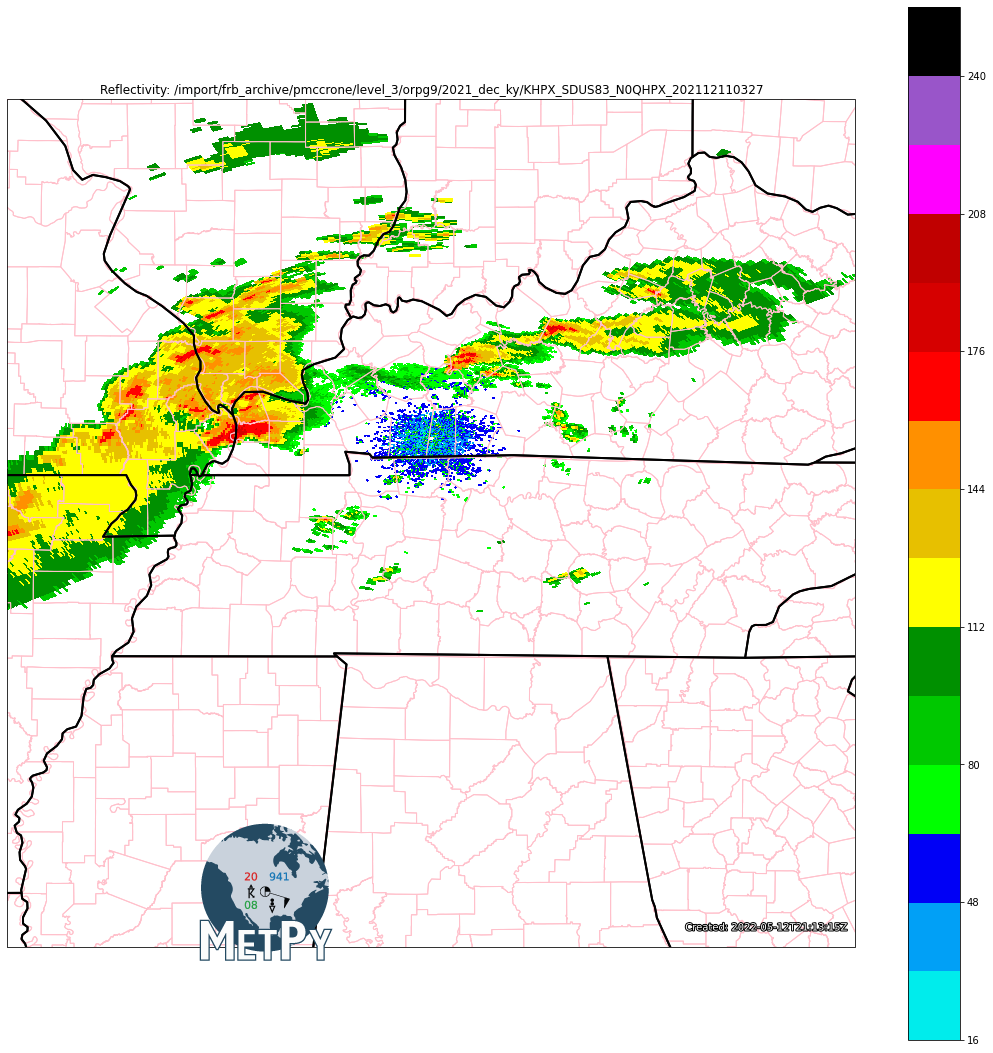

In [12]:
field_name = 'BaseReflectivityDR'
#field_name = 'CorrelationCoefficient'

#Latitude: 35.3334° (decimal), Longitude: -97.2778° (decimal), 
#KTLX is the ICAO code for the nexrad doppler radar located in OKLAHOMA CITY, OK.
#The radar's precise location is latitude 35.333361, longitude -97.277761, at an elevation of 1278

#RadarLatitude = 35.333361

#RadarLongitude= -97.277761

#print('RadarLatitude  = '+str(RadarLatitude))
#print('RadarLongitude = '+str(RadarLongitude))
#print('radarname      = '+radarname)
#print('localname      = '+My_radarname)



#proj = ccrs.LambertConformal(central_longitude=RadarLongitude, central_latitude=RadarLatitude)

proj= ccrs.Miller()

#fig, axes = plt.subplots(1, 2, figsize=(15, 8))

#ax = plt.subplot(1, 1, 1, projection=proj)



#add_metpy_logo(fig, 190, 85, size='large')
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16)# 50

#for v, ctable, axi in zip(('N0B'), ('NWSReflectivity'), ax):
# Open the file
#name = get_test_data('nids/KOUN_SDUS54_{}TLX_201305202016'.format(v), as_file_obj=False)
#f = Level3File(name)

f = Level3File(file)

   
# Pull the data out of the file object
datadict = f.sym_block[0][0]

# Turn into an array, then mask
data = np.ma.array(datadict['data'])
data[data == 0] = np.ma.masked

#data=data/2.0#data=data-32.0

# Grab azimuths and calculate a range based on number of gates
az = np.array(datadict['start_az'] + [datadict['end_az'][-1]])
rng = np.linspace(0, f.max_range, data.shape[-1] + 1)

############################################################
# Formula to find a lat lon point, when bearing, distance 
# and another lat lon is given
# Let us assume a condition, where you want to find out the 
# where will an Airplane will land up, if you have following 
# details of that Airplane, i.e actual distance it will travel, 
# the bearing and the starting point (lat,lon)?

# Let first point latitude be la1, the radar lat 
# longitude as lo1, radar lon
# d be distance, (rng for the current)
# R as radius of Earth,
# Ad be the angular distance i.e d/R and
# θ be the bearing, (az in this)
# Here is the formula to find the second point, 
# when first point, bearing and distance is known:

#latitude of second point = 
#la2 =  asin(sin la1 * cos Ad  + cos la1 * sin Ad * cos θ), 
#     and
#longitude  of second point = 
# #lo2 = lo1 + atan2(sin θ * sin Ad * cos la1 , cos Ad – sin la1 * sin la2)

la1 = RadarLatitude

lo1 = RadarLongitude


#ER is Earth Radius
ER_miles= 3958.8

ER_km   = 6378.1

ER_nm   = 3443.92

ER      = ER_km

#la2 =  asin(sin la1 * cos Ad  + cos la1 * sin Ad * cos θ),
#
#la2 =  asin(sin la1 * cos Ad  + cos la1 * sin Ad * cos θ),
#AA=sin la1
#BB=cos Ad
#CC=cos la1
#DD=sin Ad
#EE=cos thta
#la2= arcsin((AA*BB)+(CC*DD*EE))


AA = np.sin(np.deg2rad(la1))     # sin la1
BB = np.cos(np.deg2rad(rng[:, None]/ER))  # cos Ad
CC = np.cos(np.deg2rad(la1))     # cos la1
DD = np.sin(np.deg2rad(rng[:, None]/ER))  # sin Ad
EE = np.cos(np.deg2rad(az[:, None]))      # cos thta

la2 = np.arcsin((AA*BB)+(CC*DD*EE))

#lo2 = lo1 + atan2(sin θ * sin Ad * cos la1 , cos Ad – sin la1 * sin la2)
#FF= sin θ
#GG= sin Ad
#HH= cos la1
#II= cos Ad
#JJ= sin la1
#LL= sin la2
##lo2 = lo1 + atan2(FF * GG * HH , II – JJ * LL)




# Convert az,range to x,y
#xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
#ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))
xlocs = rng * np.sin(np.deg2rad(az[:, None]))
ylocs = rng * np.cos(np.deg2rad(az[:, None]))

#This data is in km.

#convert to nm then to degree
#nm

#distance between medians   = 2 pi R Cos L
# R = 3443.92 nm (radius of earth)



#scalef=np.sin(np.deg2rad(RadarLatitude))
# NOTE THIS IS WRONG.........

#lon=((xlocs*0.539957)/(60.0*scalef))+ (RadarLongitude*1.0)
#lat=((ylocs*0.539957)/60.0)+ ((RadarLatitude+1.8)*1.0)
#lat=((ylocs*0.539957)/60.0)+ ((RadarLatitude+2.0)*1.0)



#x = range_data * np.sin(np.deg2rad(azimuth_data))[:,None]
#y = range_data * np.cos(np.deg2rad(azimuth_data))[:,None]

radar_data = np.ma.array(data, mask = np.isnan(data))
radardt=radar_data/2.0
radardt=radardt-32.0

# Plot the data
#norm, cmap = colortables.get_with_steps(ctable, 16, 16)
fig = plt.figure(figsize=(19,19))

#ax = plt.subplot(1, 1, 1, projection=proj)
ax = plt.axes(projection=proj)

#ax.coastlines(resolution='110m',color='black')
deltadegree=4.0

#img_extent = (RadarLongitude-deltadegree, RadarLongitude+deltadegree, RadarLatitude-deltadegree, RadarLatitude+deltadegree)

#ax.plot(xlocs, ylocs, c=radar_data, cmap=cmap)
#ax.imshow(radar_data, transform=proj, extent=img_extent, cmap=cmap)                          

add_metpy_logo(fig, 190, 85, size='large')

state_borders = cartopy.feature.NaturalEarthFeature( category='cultural', 
                                                    name='admin_1_states_provinces_lakes',
                                                   scale='50m', facecolor='none')

#mesh=ax.pcolormesh(xlocs, ylocs, radar_data, norm=norm, cmap=cmap, zorder=0)
#mesh=ax.pcolormesh(xlocs, ylocs, radardt, norm=norm, cmap=cmap, zorder=0)
mesh=ax.pcolormesh(lon, lat, radar_data, norm=norm, cmap=cmap, zorder=0)


#ax.set_aspect('equal', 'datalim')
ax.set_ylim(RadarLatitude-deltadegree+1.0, RadarLatitude+deltadegree+1.0)
ax.set_xlim(RadarLongitude-deltadegree, RadarLongitude+deltadegree)
add_timestamp(ax, f.metadata['prod_time'], y=0.02, high_contrast=True)
ax.add_feature(USCOUNTIES.with_scale('500k'), edgecolor='pink')
cfeature.BORDERS
ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)


plt.title('Reflectivity: '+file)


fig.colorbar(mesh, ax=ax)

plt.show()

In [13]:
xlocs
print('shape is')
print(xlocs.shape)
print("max   = "+str(np.max(xlocs)))
print("min   = "+str(np.min(xlocs)))
print("mean  = "+str(np.mean(xlocs)))
print("median  = "+str(np.median(xlocs)))


shape is
(361, 461)
max   = 460.0
min   = -460.0
mean  = 0.5820372721822681
median  = 6.123233995736766e-15


In [7]:
ylocs
print('shape is')
print(ylocs.shape)
print("max   = "+str(np.max(ylocs)))
print("min   = "+str(np.min(ylocs)))
print("mean  = "+str(np.mean(ylocs)))
print("median  = "+str(np.median(ylocs)))


shape is
(721, 1841)
max   = 460.0
min   = -460.0
mean  = -0.23706423004130595
median  = -2.5717582782094416e-14


In [8]:
ylocs.shape

(721, 1841)

In [9]:
ylocs[0,0]
ylocs[50,51]

-12.192885638528704

In [10]:
radar_data
print('shape is')
print(radar_data.shape)
print("max   = "+str(np.max(radar_data)))
print("min   = "+str(np.min(radar_data)))
print("mean  = "+str(np.mean(radar_data)))
print("median  = "+str(np.median(radar_data)))


shape is
(720, 1840)
max   = 206
min   = 21
mean  = 96.95009880464396
median  = --


/home/pmccrone/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [11]:
radar_data.shape

(720, 1840)

In [12]:
radardt=radar_data/2.0
radardt=radardt-32.0


In [13]:
print('shape is')
print(radardt.shape)
print("max   = "+str(np.max(radardt)))
print("min   = "+str(np.min(radardt)))
print("mean  = "+str(np.mean(radardt)))
print("median  = "+str(np.median(radardt)))

shape is
(720, 1840)
max   = 71.0
min   = -21.5
mean  = 16.47504940232198
median  = --
